In [1]:
import pickle
import seaborn as sns

In [2]:
with open("measure-barzur.pkl", "rb") as pkl:
    load = pickle.load(pkl)
    their = load["their"]
    our = load["our"]
    data = load["data"]

print("their:", their["model"], their["mdp"], sep="\n")
print()
print("our:", our["model"], our["mdp"], sep="\n")
data = data.assign(rpp_minus_alpha=data.rpp - data.alpha)
data

their:
barzur20aft.Bitcoin(alpha=0.125, gamma=0.25, maximum_fork_length=8)
MDP of size 179 / 4 / 657 / 3.7

our:
sm.SelfishMining(Bitcoin(), alpha=0.125, gamma=0.25, maximum_height=8, maximum_size=0, force_consider_own=True)
MDP of size 18279 / 4 / 90235 / 4.9


,alpha,gamma,horizon,eps,model,vi_discount,vi_delta,vi_stop_delta,vi_iter,vi_max_iter,...,vi_max_value,ss_reachable,ss_nonzero,ss_time,pe_iter,ptrev,rpp,time,vi_steady_value,rpp_minus_alpha
0,0.15,1.00,100,0.01,their,1,0.009963,0.01,453,0,...,23.157260,103,103,0.040066,2,0.082253,0.176459,0.234324,15.756964,2.645874e-02
1,0.15,1.00,100,0.01,our,1,0.009986,0.01,457,0,...,23.089908,277,277,0.011615,2,0.081078,0.176463,33.663616,15.681840,2.646317e-02
2,0.20,0.25,50,0.01,their,1,0.009956,0.01,269,0,...,16.786449,47,47,0.050626,2,0.100000,0.200000,0.180323,9.341109,1.720846e-15
3,0.20,0.25,50,0.01,our,1,0.009856,0.01,300,0,...,16.928514,139,139,0.003682,2,0.100000,0.200000,22.027263,9.517040,1.544043e-13
4,0.40,0.00,25,0.01,their,1,0.009944,0.01,155,0,...,17.699697,82,82,0.045342,2,0.243259,0.469387,0.127660,12.128761,6.938691e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.45,0.75,25,0.01,our,1,0.009865,0.01,226,0,...,21.541850,932,932,0.128103,2,0.263311,0.735065,17.755519,18.870408,2.850654e-01
266,0.35,0.00,25,0.01,their,1,0.009792,0.01,143,0,...,15.641648,80,80,0.001870,2,0.190100,0.365581,0.088002,9.299289,1.558122e-02
267,0.35,0.00,25,0.01,our,1,0.009905,0.01,159,0,...,15.489465,352,352,0.015826,2,0.157038,0.365581,12.584299,9.331204,1.558122e-02
268,0.10,0.50,50,0.01,their,1,0.009881,0.01,221,0,...,12.085757,47,47,0.001447,2,0.050000,0.100000,0.212234,4.464096,3.830269e-15


In [3]:
data[(data.ss_reachable - data.ss_nonzero) != 0]

,alpha,gamma,horizon,eps,model,vi_discount,vi_delta,vi_stop_delta,vi_iter,vi_max_iter,...,vi_max_value,ss_reachable,ss_nonzero,ss_time,pe_iter,ptrev,rpp,time,vi_steady_value,rpp_minus_alpha
44,0.05,0.00,25,0.01,their,1,0.009612,0.01,81,0,...,8.725568,5,4,0.001050,2,0.025,0.05,0.051836,1.010755,-6.106227e-16
48,0.05,0.50,25,0.01,their,1,0.009612,0.01,81,0,...,8.725568,5,4,0.001141,2,0.025,0.05,0.052820,1.010755,-6.106227e-16
58,0.05,0.75,25,0.01,their,1,0.009612,0.01,81,0,...,8.725568,5,4,0.001061,2,0.025,0.05,0.051971,1.010755,-6.106227e-16
102,0.05,0.25,25,0.01,their,1,0.009612,0.01,81,0,...,8.725568,5,4,0.001046,2,0.025,0.05,0.051862,1.010755,-6.106227e-16


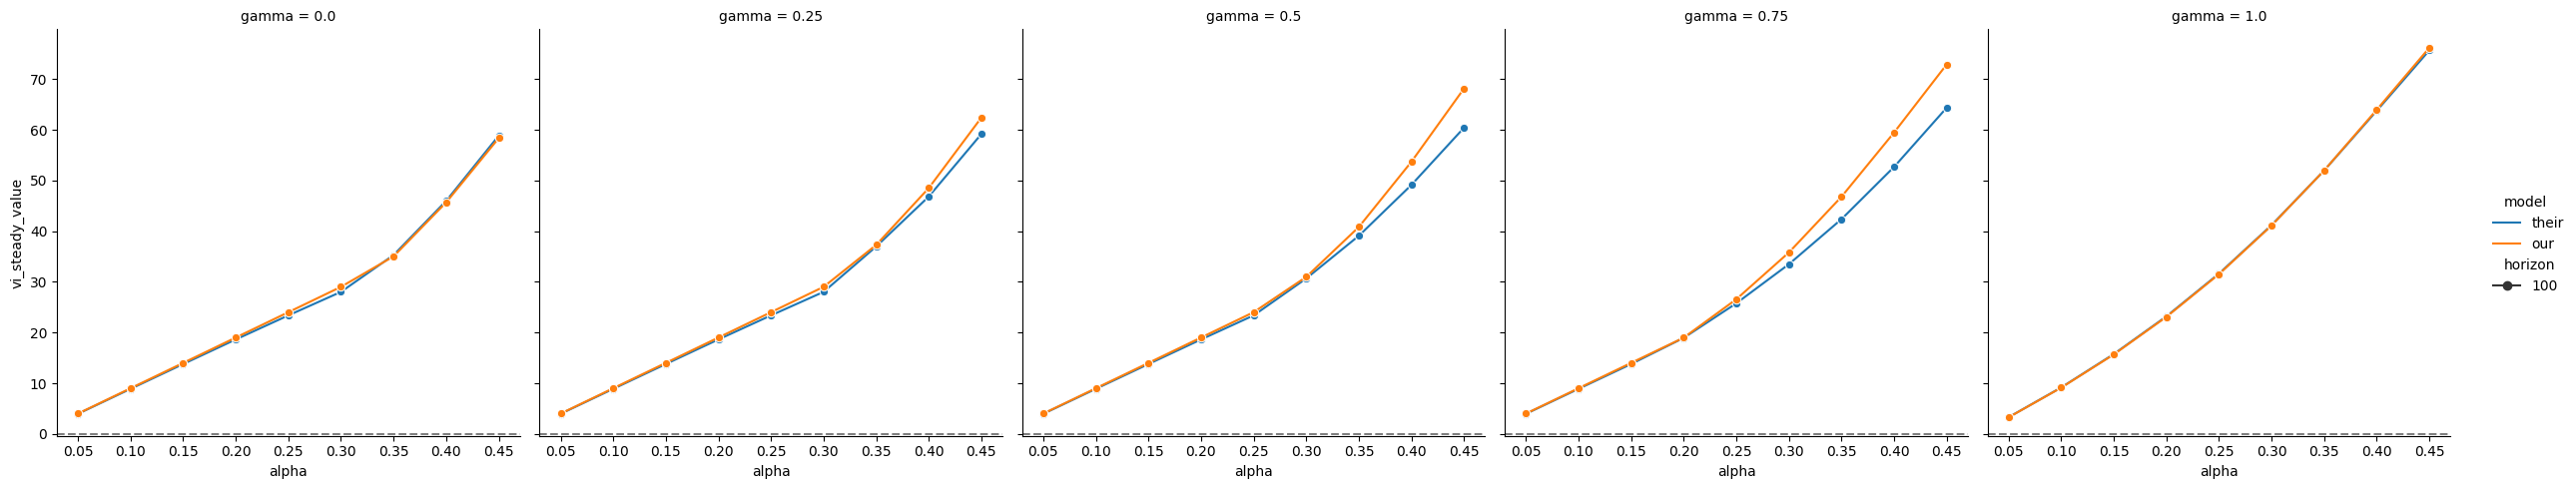

In [4]:
# Compare model w.r.t. reward
sns.relplot(
    data.query("horizon==horizon.max() and eps==eps.min()"),
    x="alpha",
    y="vi_steady_value",
    col="gamma",
    style="horizon",
    hue="model",
    kind="line",
    markers=True,
).refline(y=0)

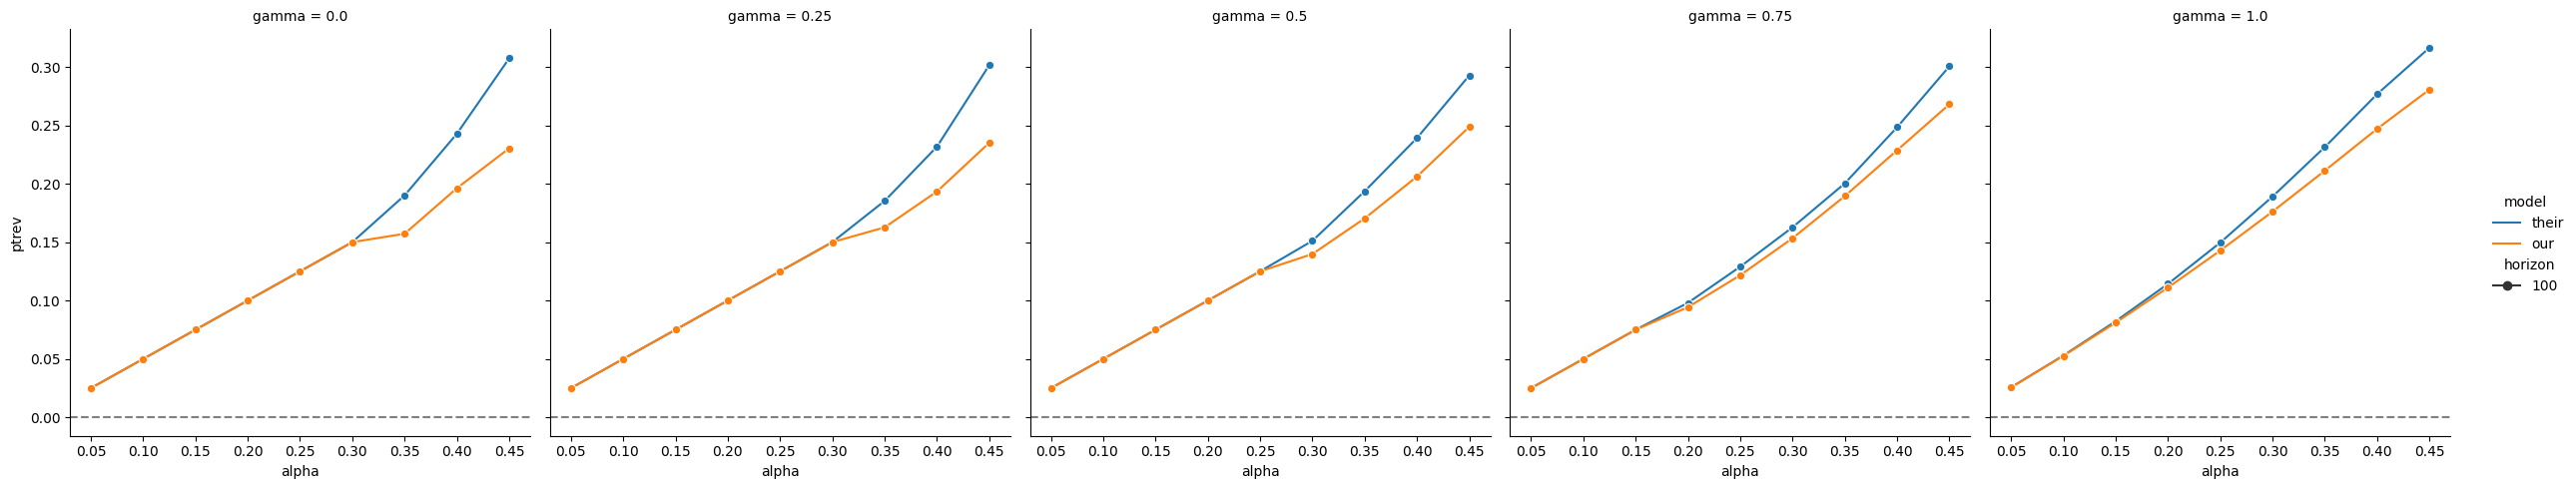

In [5]:
# Compare model w.r.t. reward
sns.relplot(
    data.query("horizon==horizon.max() and eps==eps.min()"),
    x="alpha",
    y="ptrev",
    col="gamma",
    style="horizon",
    hue="model",
    kind="line",
    markers=True,
).refline(y=0)

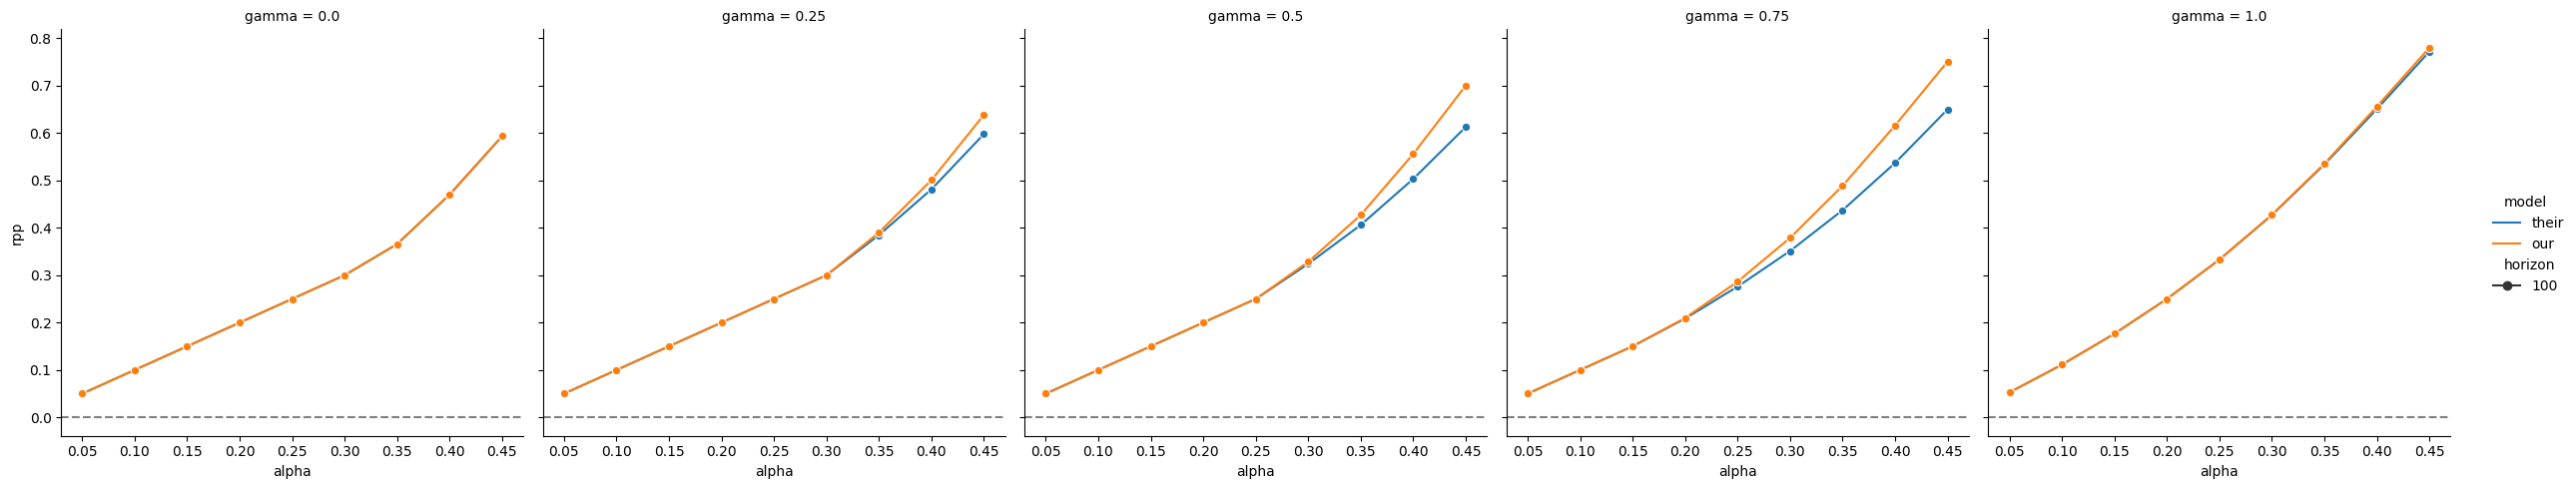

In [6]:
# Compare model w.r.t. reward
sns.relplot(
    data.query("horizon==horizon.max() and eps==eps.min()"),
    x="alpha",
    y="rpp",
    col="gamma",
    style="horizon",
    hue="model",
    kind="line",
    markers=True,
).refline(y=0)

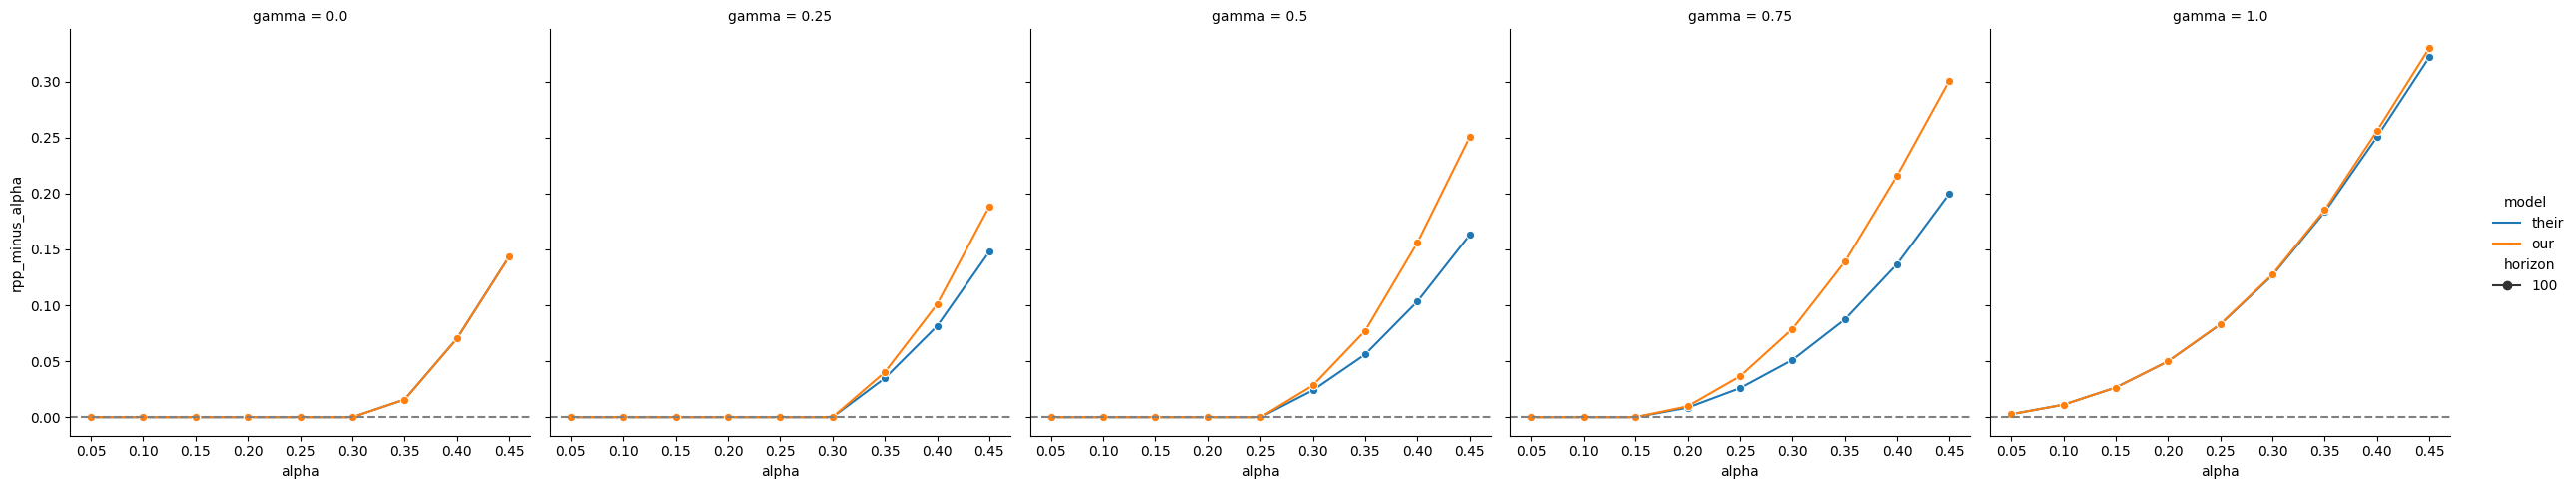

In [7]:
# Compare model w.r.t. reward
sns.relplot(
    data.query("horizon==horizon.max() and eps==eps.min()"),
    x="alpha",
    y="rpp_minus_alpha",
    col="gamma",
    style="horizon",
    hue="model",
    kind="line",
    markers=True,
).refline(y=0)

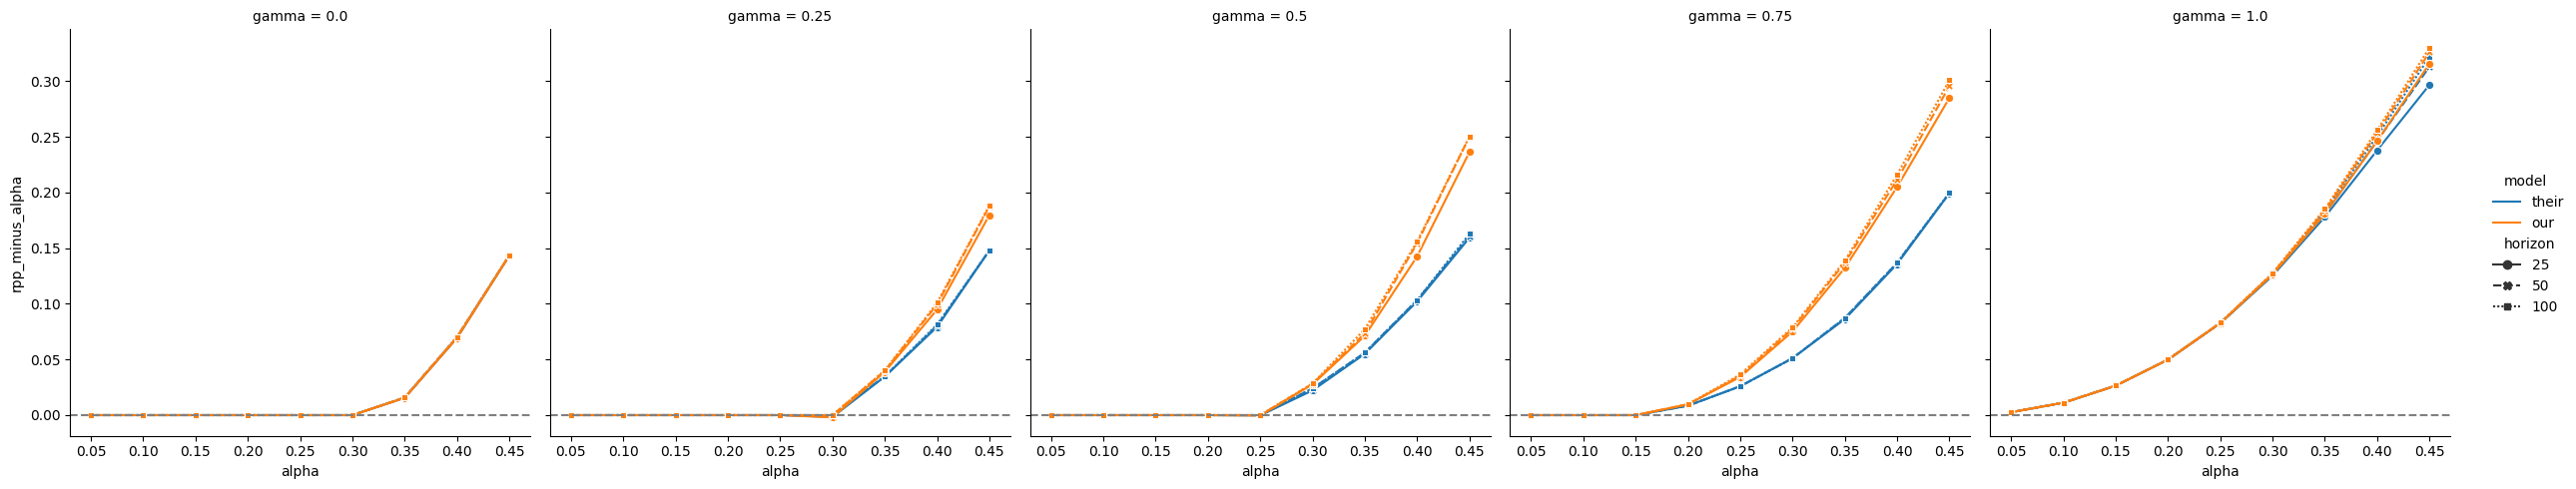

In [8]:
# Demonstrate effect of horizon
sns.relplot(
    data.query("eps==eps.min()"),
    x="alpha",
    y="rpp_minus_alpha",
    col="gamma",
    hue="model",
    style="horizon",
    kind="line",
    markers=True,
).refline(y=0)

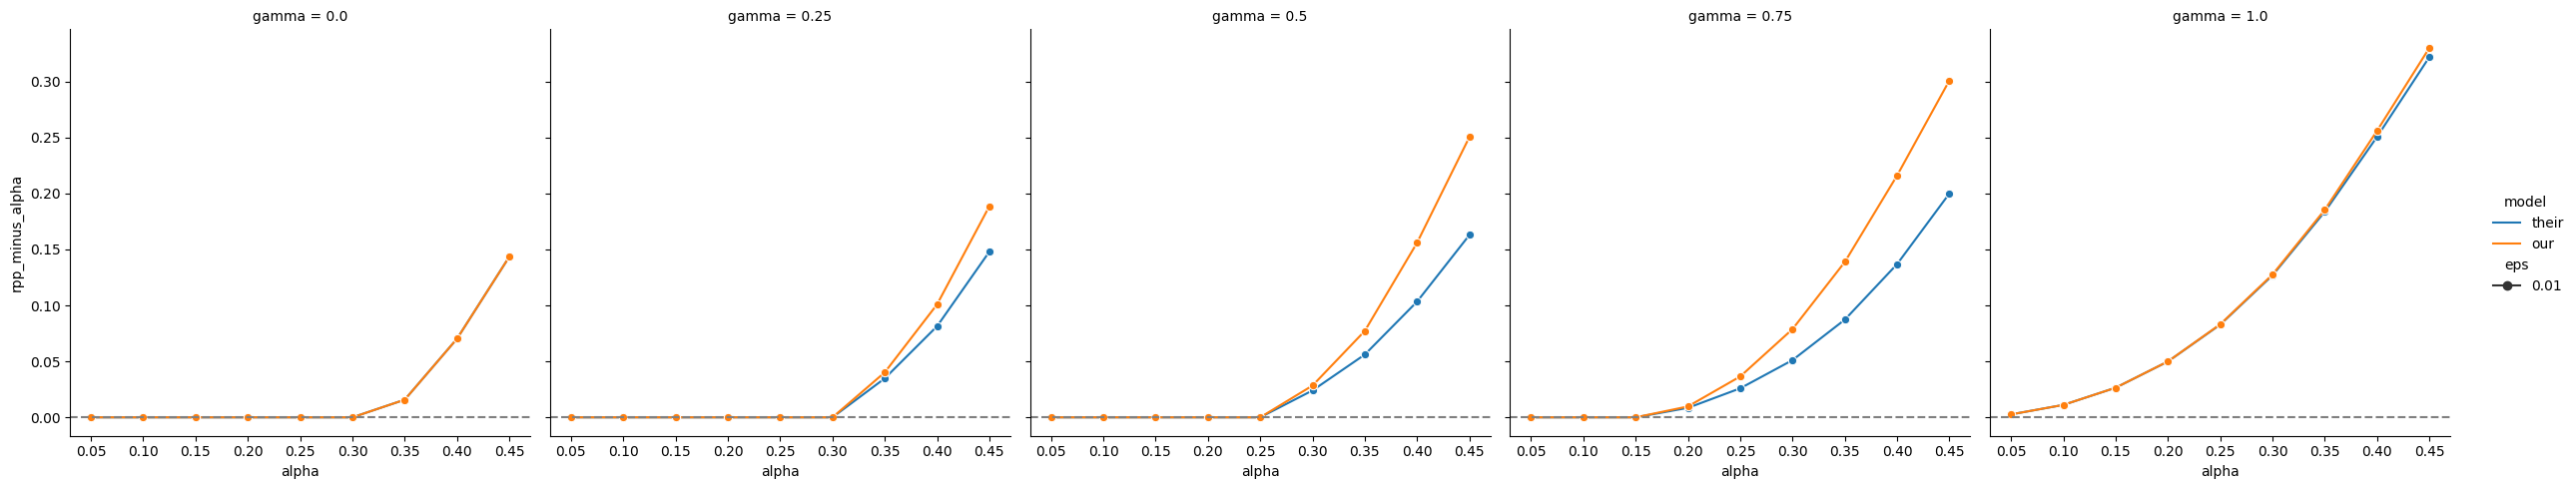

In [9]:
# Demonstrate effect of eps
sns.relplot(
    data.query("horizon==horizon.max()"),
    x="alpha",
    y="rpp_minus_alpha",
    col="gamma",
    hue="model",
    style="eps",
    kind="line",
    markers=True,
).refline(y=0)

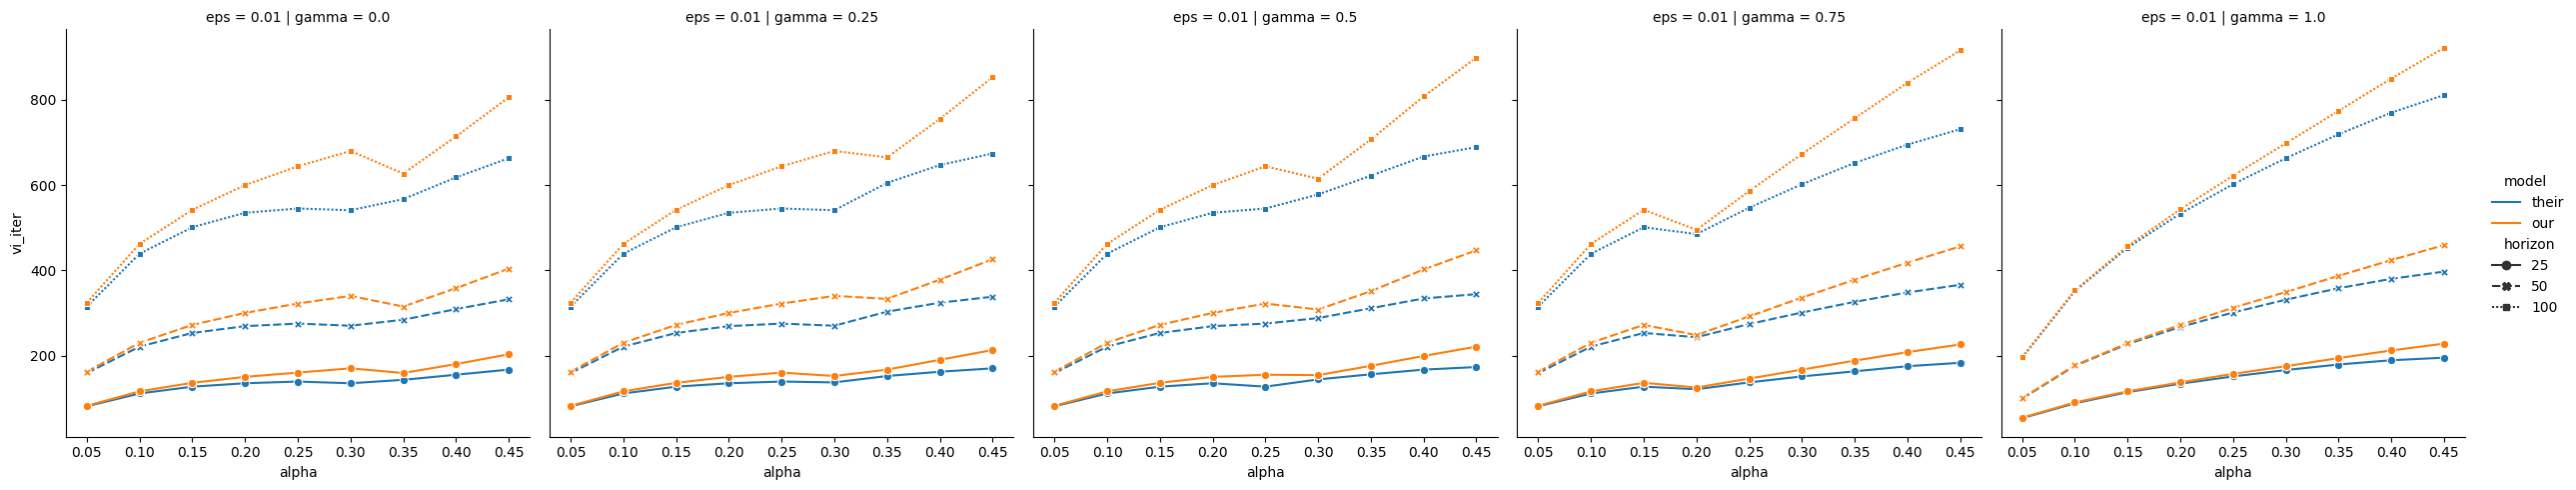

In [10]:
# Visualize number iterations required in value iteration
# It's intersting that the models behave so similar!
sns.relplot(
    data,
    x="alpha",
    y="vi_iter",
    col="gamma",
    hue="model",
    row="eps",
    style="horizon",
    kind="line",
    markers=True,
)

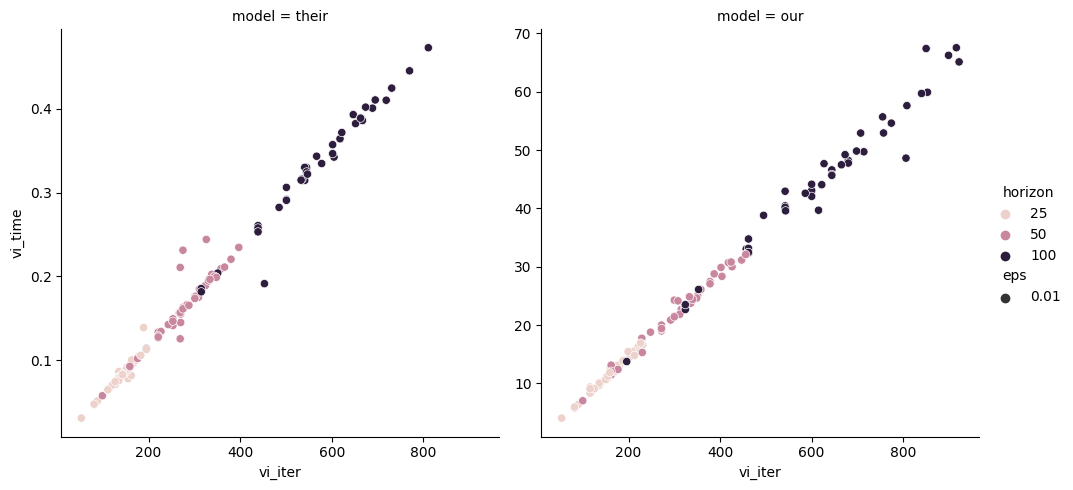

In [11]:
# Visualize solving time
# Naturally, the smaller model can be iterated much faster
sns.relplot(
    data,
    x="vi_iter",
    y="vi_time",
    hue="horizon",
    style="eps",
    col="model",
    facet_kws=dict(sharey=False),
)

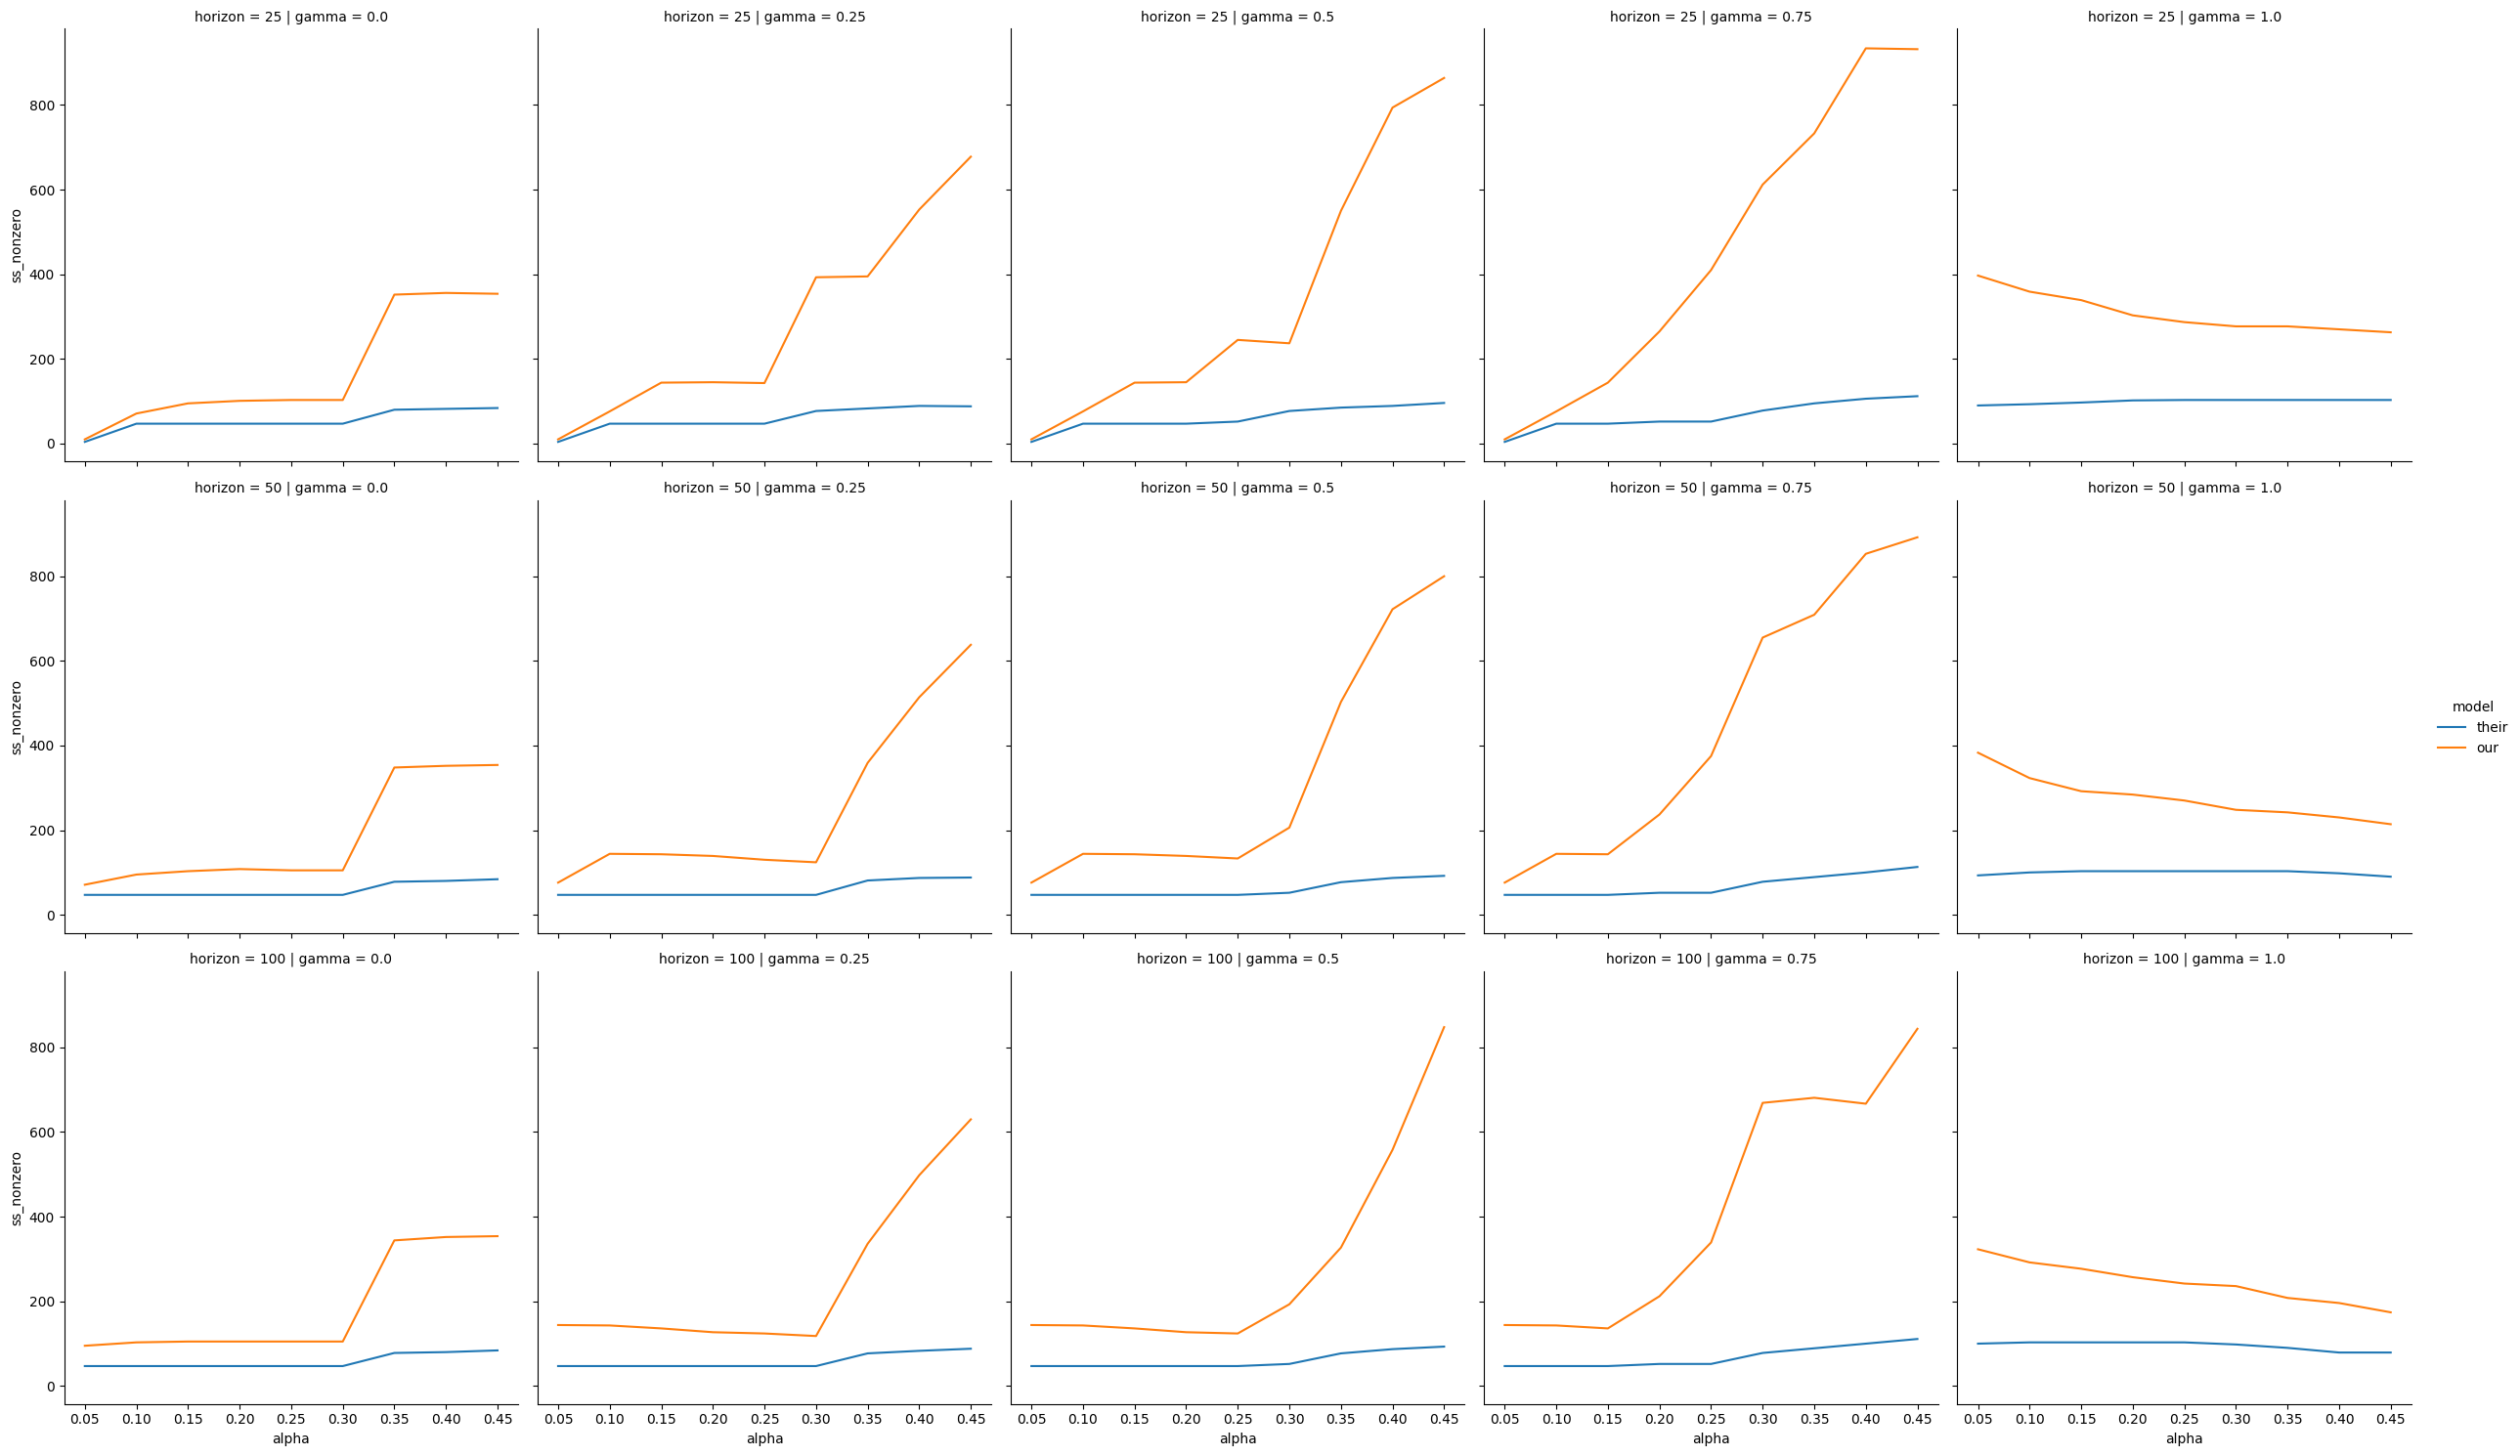

In [12]:
# Size of policy / steady state
sns.relplot(
    data,
    x="alpha",
    y="ss_nonzero",
    col="gamma",
    row="horizon",
    hue="model",
    kind="line",
    markers=True,
)

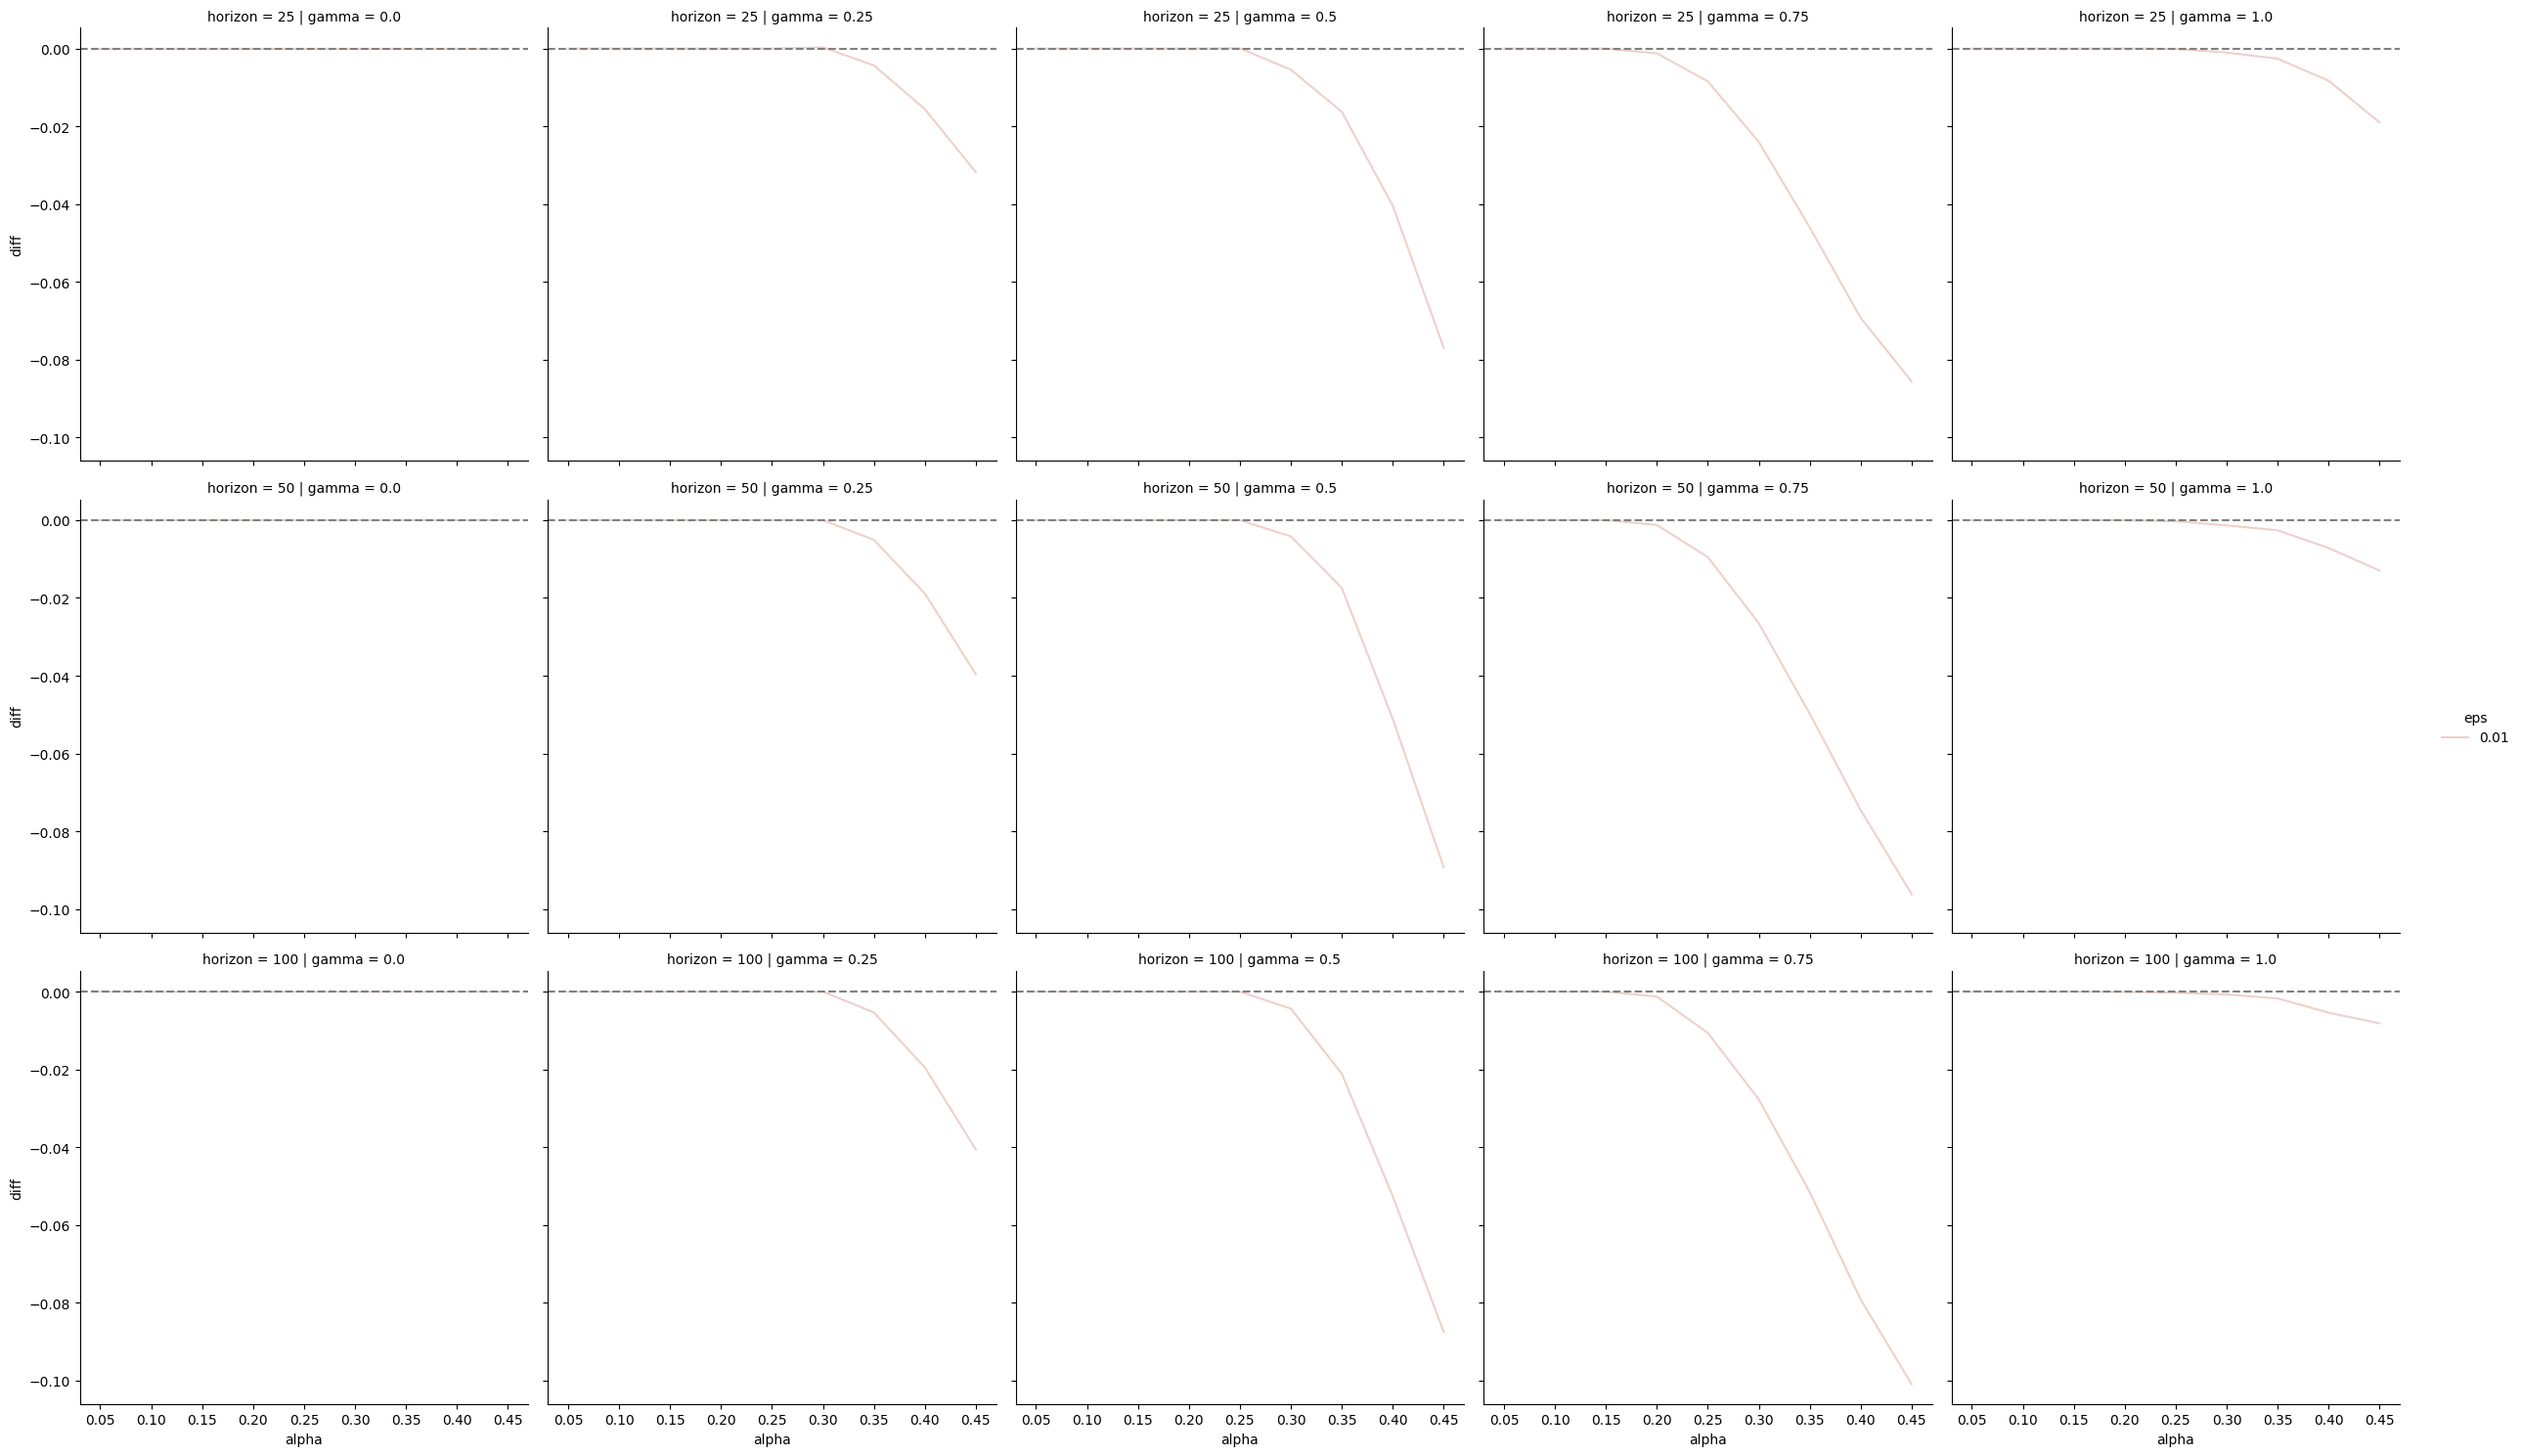

In [13]:
# We're now interested in the difference between the models
# Can we bring the difference down by selecting better hyper params?
diff = data.pivot(
    index=["alpha", "gamma", "horizon", "eps"], columns="model", values=["rpp"]
)
diff.columns = [j for i, j in diff.columns]
diff["diff"] = diff.their - diff.our
diff = diff.reset_index()
sns.relplot(
    kind="line",
    data=diff,
    x="alpha",
    y="diff",
    row="horizon",
    col="gamma",
    hue="eps",
).refline(y=0)